In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv('dataset.csv')
df = df.dropna()

In [18]:
# Create a copy to leave the original dataset unchanged
students_df = df.copy()

# Change the Target to Numerical Value 0 or 1. Predicting whether a student will graduate or dropout
students_df.replace("Dropout", 0, inplace=True)
students_df.replace("Graduate", 1, inplace=True)
students_df.drop(students_df[students_df["Target"] == "Enrolled"].index, inplace=True)

# Split the data into training and test sets
y = students_df["Target"]
y = y.astype('int')
X = students_df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize a StandardScaler object to scale the features
scaler = StandardScaler()

# Scale the training data using the StandardScaler object
X_scaled = scaler.fit_transform(X_train)

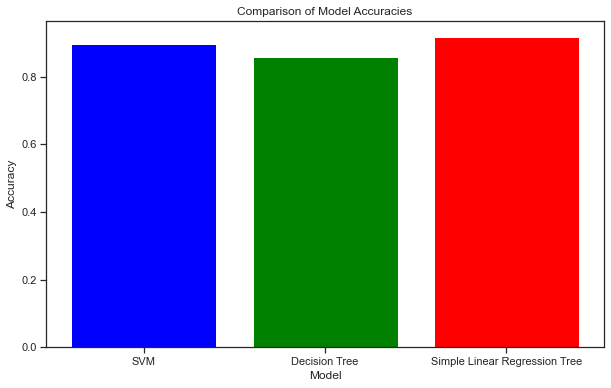

In [19]:
# Train models and calculate accuracies
log_reg = LogisticRegression(max_iter=1000)
dtc = DecisionTreeClassifier()
svm = SVC()

log_reg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
svm.fit(X_train, y_train)

log_reg_y_pred = log_reg.predict(X_test)
dtc_y_pred = dtc.predict(X_test)
svm_y_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
slrt_accuracy = accuracy_score(y_test, log_reg_y_pred)

accuracy_scores = [svm_accuracy, dtc_accuracy, slrt_accuracy]
model_names = ['SVM', 'Decision Tree', 'Simple Linear Regression Tree']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

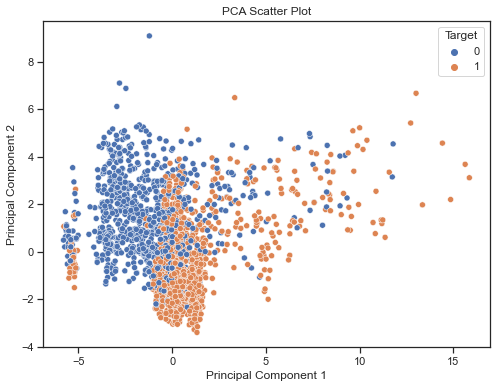

In [20]:
# Initialize a PCA object to perform dimensionality reduction
pca = PCA(n_components=2)

# Fit the PCA object on the scaled training data
pca.fit(X_scaled)

# Use the fitted PCA object to transform the scaled training data into 2 dimensions
X_pca = pca.transform(X_scaled)

# Create a pandas DataFrame with the transformed data and the target values
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Target'] = y_train.values

# Scatter plot of the transformed data
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Target'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

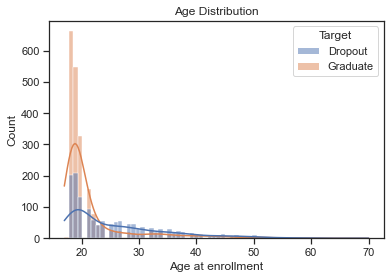

In [21]:
# Map target values to labels
students_df['Target'] = students_df['Target'].map({0: 'Dropout', 1: 'Graduate'})

# Plot histogram of features with renamed labels
sns.set(style="ticks", color_codes=True)
sns.histplot(data=students_df, x="Age at enrollment", hue="Target", kde=True)
plt.title("Age Distribution")
plt.show()

Logistic Regression Accuracy (Default Params): 0.92


C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

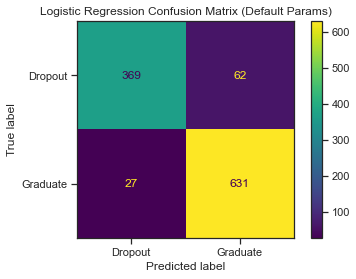

C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Accuracy (Grid Search Params): 0.92


C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

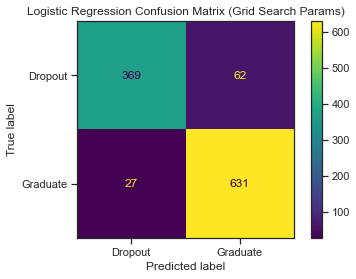

In [23]:
# Confusion matrix and accuracy for logistic regression with default parameters
log_reg_default = LogisticRegression(max_iter=1000)
log_reg_default.fit(X_train, y_train)
log_reg_default_pred = log_reg_default.predict(X_test)

log_reg_default_accuracy = accuracy_score(y_test, log_reg_default_pred)
print(f"Logistic Regression Accuracy (Default Params): {log_reg_default_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plot_confusion_matrix(log_reg_default, X_test, y_test, display_labels=['Dropout', 'Graduate'])
plt.title('Logistic Regression Confusion Matrix (Default Params)')
plt.show()

# Confusion matrix and accuracy for logistic regression with grid search parameters 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
log_reg_grid_pred = log_reg_grid.predict(X_test)

log_reg_grid_accuracy = accuracy_score(y_test, log_reg_grid_pred)
print(f"Logistic Regression Accuracy (Grid Search Params): {log_reg_grid_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plot_confusion_matrix(log_reg_grid, X_test, y_test, display_labels=['Dropout', 'Graduate'])
plt.title('Logistic Regression Confusion Matrix (Grid Search Params)')
plt.show()

Decision Tree Accuracy (Default Params): 0.87


C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

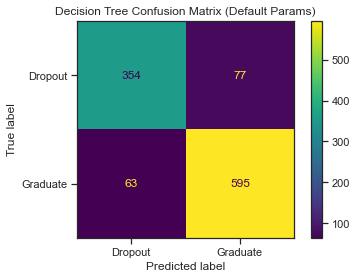

Decision Tree Accuracy (Grid Search Params): 0.88


C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

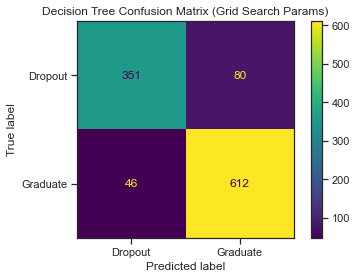

In [24]:
# Confusion matrix and accuracy for decision tree with default parameters
dtc_default = DecisionTreeClassifier()
dtc_default.fit(X_train, y_train)
dtc_default_pred = dtc_default.predict(X_test)

dtc_default_accuracy = accuracy_score(y_test, dtc_default_pred)
print(f"Decision Tree Accuracy (Default Params): {dtc_default_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plot_confusion_matrix(dtc_default, X_test, y_test, display_labels=['Dropout', 'Graduate'])
plt.title('Decision Tree Confusion Matrix (Default Params)')
plt.show()

# Confusion matrix and accuracy for decision tree with grid search parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
dtc_grid.fit(X_train, y_train)
dtc_grid_pred = dtc_grid.predict(X_test)

dtc_grid_accuracy = accuracy_score(y_test, dtc_grid_pred)
print(f"Decision Tree Accuracy (Grid Search Params): {dtc_grid_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plot_confusion_matrix(dtc_grid, X_test, y_test, display_labels=['Dropout', 'Graduate'])
plt.title('Decision Tree Confusion Matrix (Grid Search Params)')
plt.show()

SVM Accuracy (Default Params): 0.90


C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

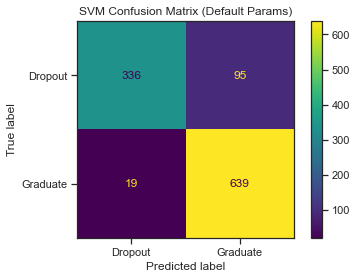

SVM Accuracy (Grid Search Params): 0.91


C:\Users\dhrum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

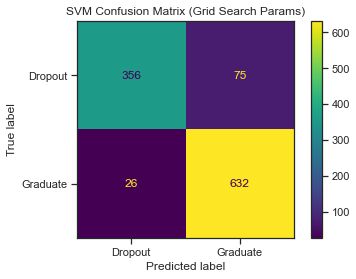

In [25]:
# Confusion matrix and accuracy for SVM with default parameters
svm_default = SVC()
svm_default.fit(X_train, y_train)
svm_default_pred = svm_default.predict(X_test)

svm_default_accuracy = accuracy_score(y_test, svm_default_pred)
print(f"SVM Accuracy (Default Params): {svm_default_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plot_confusion_matrix(svm_default, X_test, y_test, display_labels=['Dropout', 'Graduate'])
plt.title('SVM Confusion Matrix (Default Params)')
plt.show()

# Confusion matrix and accuracy for SVM with grid search parameters 
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
svm_grid_pred = svm_grid.predict(X_test)

svm_grid_accuracy = accuracy_score(y_test, svm_grid_pred)
print(f"SVM Accuracy (Grid Search Params): {svm_grid_accuracy:.2f}")

plt.figure(figsize=(8, 6))
plot_confusion_matrix(svm_grid, X_test, y_test, display_labels=['Dropout', 'Graduate'])
plt.title('SVM Confusion Matrix (Grid Search Params)')
plt.show()